# Create Database & Fill Data

Creating the database and filling sufficient data into it is a major task for the backend. The aim is to have sufficient movies and associated directors, actors, as well as images in the database. By meaning 'sufficient', we aim to provide at least 1000 movies using the [IMDB interface](https://www.imdb.com/interfaces/). It provides many tsv files which contains the entire database, and is refreshed daily. We pick the top 1000 movies from it, and build our own database. 

## Build the movie & genre dataframe

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# download from https://www.imdb.com/interfaces/ if you want to run the file
assert(os.path.exists("name.basics.tsv"))
assert(os.path.exists("title.akas.tsv"))
assert(os.path.exists("title.basics.tsv"))
assert(os.path.exists("title.principals.tsv"))
assert(os.path.exists("title.ratings.tsv"))

In [4]:
basics = pd.read_csv("title.basics.tsv", sep="\t", na_values=["\\N"], keep_default_na=True, low_memory=False)
print("{} records".format(len(basics)))
basics.head(n=20)

9634768 records


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894.0,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894.0,NaN,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,NaN,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,NaN,1,"Documentary,Short"


In [5]:
# we only need movie
basics["titleType"].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [6]:
# filter only movie
basics = basics[basics["titleType"] == "movie"]
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100,NaN
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90,Drama


In [7]:
# filter only tconst, primaryTitle, startYear, runtimeMinutes, genres
basics = basics[["tconst", "primaryTitle", "startYear", "runtimeMinutes", "genres"]]
basics = basics.reset_index(drop=True)

# remove any row with any empty values
basics = basics.dropna(axis=0)

# show the dataset
print("{} records".format(len(basics)))
basics.head()

371208 records


,tconst,primaryTitle,startYear,runtimeMinutes,genres
0,tt0000009,Miss Jerry,1894.0,45,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,1897.0,100,"Documentary,News,Sport"
3,tt0000574,The Story of the Kelly Gang,1906.0,70,"Action,Adventure,Biography"
4,tt0000591,The Prodigal Son,1907.0,90,Drama
8,tt0000679,The Fairylogue and Radio-Plays,1908.0,120,"Adventure,Fantasy"


In [8]:
# read the ratings dataset
ratings = pd.read_csv("title.ratings.tsv", sep="\t", na_values=["\\N"], keep_default_na=True)
ratings = ratings.dropna(axis=0)
print("{} records".format(len(ratings)))
ratings.head(n=20)

1282624 records


,tconst,averageRating,numVotes
0,tt0000001,5.7,1953
1,tt0000002,5.8,263
2,tt0000003,6.5,1787
3,tt0000004,5.6,179
4,tt0000005,6.2,2589
5,tt0000006,5.1,177
6,tt0000007,5.4,812
7,tt0000008,5.4,2096
8,tt0000009,5.3,204
9,tt0000010,6.9,7067


In [9]:
# join with the basics on tconst
# use left outer join
basics = pd.merge(basics, ratings, how="left", on="tconst")
basics = basics.dropna(axis=0)

# show
print("{} records".format(len(basics)))
basics.head()

253985 records


,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894.0,45,Romance,5.3,204.0
1,tt0000147,The Corbett-Fitzsimmons Fight,1897.0,100,"Documentary,News,Sport",5.2,466.0
2,tt0000574,The Story of the Kelly Gang,1906.0,70,"Action,Adventure,Biography",6.0,812.0
3,tt0000591,The Prodigal Son,1907.0,90,Drama,4.4,20.0
4,tt0000679,The Fairylogue and Radio-Plays,1908.0,120,"Adventure,Fantasy",5.2,67.0


<Axes: xlabel='averageRating', ylabel='Count'>

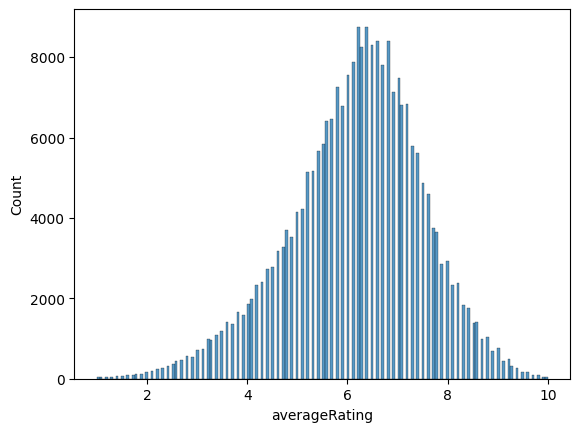

In [10]:
# check the distribution of ratings
sns.histplot(data=basics["averageRating"])

In [11]:
# get some statistics of number of votes
basics["numVotes"].describe()

count    2.539850e+05
mean     4.053129e+03
std      3.717688e+04
min      5.000000e+00
25%      2.300000e+01
50%      7.900000e+01
75%      3.960000e+02
max      2.704471e+06
Name: numVotes, dtype: float64

In [12]:
basics["startYear"].describe()

count    253985.000000
mean       1994.629092
std          25.713252
min        1894.000000
25%        1978.000000
50%        2005.000000
75%        2015.000000
max        2023.000000
Name: startYear, dtype: float64

In [13]:
# filter for the past 10 years, with a large weight on the numVotes, and averageRating >= 5.0
basics = basics[(basics["startYear"] >= 2013) & (basics["numVotes"] >= 40000) & (basics["averageRating"] >= 5.0)]

# sort with popularity
basics = basics.sort_values(by="numVotes", ascending=False)

# and reset index
basics = basics.reset_index(drop=True)

print(len(basics))
basics.head(n=20)

1350


,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0816692,Interstellar,2014.0,169,"Adventure,Drama,Sci-Fi",8.6,1862605.0
1,tt0993846,The Wolf of Wall Street,2013.0,180,"Biography,Comedy,Crime",8.2,1432758.0
2,tt7286456,Joker,2019.0,122,"Crime,Drama,Thriller",8.4,1313620.0
3,tt2015381,Guardians of the Galaxy,2014.0,121,"Action,Adventure,Comedy",8.0,1191106.0
4,tt4154796,Avengers: Endgame,2019.0,181,"Action,Adventure,Drama",8.4,1150343.0
5,tt4154756,Avengers: Infinity War,2018.0,149,"Action,Adventure,Sci-Fi",8.4,1097241.0
6,tt1431045,Deadpool,2016.0,108,"Action,Comedy",8.0,1050163.0
7,tt1392190,Mad Max: Fury Road,2015.0,120,"Action,Adventure,Sci-Fi",8.1,1014613.0
8,tt2267998,Gone Girl,2014.0,149,"Drama,Mystery,Thriller",8.1,994493.0
9,tt2488496,Star Wars: Episode VII - The Force Awakens,2015.0,138,"Action,Adventure,Sci-Fi",7.8,938269.0


In [14]:
# now takes the tconst, and genres out
genres = basics[["tconst", "genres"]].copy()

print(len(genres))
genres.head(n=10)

1350


,tconst,genres
0,tt0816692,"Adventure,Drama,Sci-Fi"
1,tt0993846,"Biography,Comedy,Crime"
2,tt7286456,"Crime,Drama,Thriller"
3,tt2015381,"Action,Adventure,Comedy"
4,tt4154796,"Action,Adventure,Drama"
5,tt4154756,"Action,Adventure,Sci-Fi"
6,tt1431045,"Action,Comedy"
7,tt1392190,"Action,Adventure,Sci-Fi"
8,tt2267998,"Drama,Mystery,Thriller"
9,tt2488496,"Action,Adventure,Sci-Fi"


In [15]:
# split the text string with comma
genres["genres"] = genres["genres"].str.split(",")
print(len(genres))
genres.head(n=10)

1350


,tconst,genres
0,tt0816692,"[Adventure, Drama, Sci-Fi]"
1,tt0993846,"[Biography, Comedy, Crime]"
2,tt7286456,"[Crime, Drama, Thriller]"
3,tt2015381,"[Action, Adventure, Comedy]"
4,tt4154796,"[Action, Adventure, Drama]"
5,tt4154756,"[Action, Adventure, Sci-Fi]"
6,tt1431045,"[Action, Comedy]"
7,tt1392190,"[Action, Adventure, Sci-Fi]"
8,tt2267998,"[Drama, Mystery, Thriller]"
9,tt2488496,"[Action, Adventure, Sci-Fi]"


In [16]:
# explode
genres = genres.explode("genres")
print(len(genres))
genres.head(n=10)

3644


,tconst,genres
0,tt0816692,Adventure
0,tt0816692,Drama
0,tt0816692,Sci-Fi
1,tt0993846,Biography
1,tt0993846,Comedy
1,tt0993846,Crime
2,tt7286456,Crime
2,tt7286456,Drama
2,tt7286456,Thriller
3,tt2015381,Action


## Build the director and actor dataframe

In [17]:
principals = pd.read_csv("title.principals.tsv", sep="\t", na_values=["\\N"], keep_default_na=True, low_memory=False)

print(len(principals))
principals.head(n=20)

54758395


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN
5,tt0000003,1,nm0721526,director,NaN,NaN
6,tt0000003,2,nm1770680,producer,producer,NaN
7,tt0000003,3,nm1335271,composer,NaN,NaN
8,tt0000003,4,nm5442200,editor,NaN,NaN
9,tt0000004,1,nm0721526,director,NaN,NaN


In [18]:
# only keep 3 columns
principals = principals[["tconst", "nconst", "category"]]
print(len(principals))
principals.head(n=20)

54758395


,tconst,nconst,category
0,tt0000001,nm1588970,self
1,tt0000001,nm0005690,director
2,tt0000001,nm0374658,cinematographer
3,tt0000002,nm0721526,director
4,tt0000002,nm1335271,composer
5,tt0000003,nm0721526,director
6,tt0000003,nm1770680,producer
7,tt0000003,nm1335271,composer
8,tt0000003,nm5442200,editor
9,tt0000004,nm0721526,director


In [19]:
principals["category"].unique()

array(['self', 'director', 'cinematographer', 'composer', 'producer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [20]:
# only keep director, actor, actress
principals = principals[principals["category"].isin(["director", "actor", "actress"])]
print(len(principals))
principals.head(n=20)

27779291


,tconst,nconst,category
1,tt0000001,nm0005690,director
3,tt0000002,nm0721526,director
5,tt0000003,nm0721526,director
9,tt0000004,nm0721526,director
11,tt0000005,nm0443482,actor
12,tt0000005,nm0653042,actor
13,tt0000005,nm0005690,director
15,tt0000006,nm0005690,director
16,tt0000007,nm0179163,actor
17,tt0000007,nm0183947,actor


In [21]:
# extract the tconst from basics, and merge the two tables
tconst = basics["tconst"].copy()
principals = pd.merge(tconst, principals, how="left", on="tconst")

print(len(principals))
principals.head(n=20)

6776


,tconst,nconst,category
0,tt0816692,nm0000190,actor
1,tt0816692,nm0004266,actress
2,tt0816692,nm1567113,actress
3,tt0816692,nm3237775,actress
4,tt0816692,nm0634240,director
5,tt0993846,nm0000138,actor
6,tt0993846,nm1706767,actor
7,tt0993846,nm3053338,actress
8,tt0993846,nm0000190,actor
9,tt0993846,nm0000217,director


In [22]:
# dropna
principals = principals.dropna(axis=0)

# breakdown into two tables: directors, actors
movies_directors = principals[principals["category"] == "director"].copy()
movies_actors = principals[principals["category"] != "director"].copy()

# only keep two columns
movies_directors = movies_directors[["tconst", "nconst"]]
movies_actors = movies_actors[["tconst", "nconst"]]

In [23]:
print(len(movies_directors))
movies_directors.head()

1427


,tconst,nconst
4,tt0816692,nm0634240
9,tt0993846,nm0000217
14,tt7286456,nm0680846
19,tt2015381,nm0348181
24,tt4154796,nm0751577


In [24]:
print(len(movies_actors))
movies_actors.head()

5348


,tconst,nconst
0,tt0816692,nm0000190
1,tt0816692,nm0004266
2,tt0816692,nm1567113
3,tt0816692,nm3237775
5,tt0993846,nm0000138


In [25]:
# now reaad the name table, and get the information
people = pd.read_csv("name.basics.tsv", sep="\t", na_values=["\\N"], keep_default_na=True, low_memory=False)

print(len(people))
people.head(n=20)

12322241


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0050419,tt0045537,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0057345,tt0056404"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"
5,nm0000006,Ingrid Bergman,1915.0,1982.0,"actress,soundtrack,producer","tt0038109,tt0034583,tt0038787,tt0036855"
6,nm0000007,Humphrey Bogart,1899.0,1957.0,"actor,soundtrack,producer","tt0037382,tt0034583,tt0042593,tt0043265"
7,nm0000008,Marlon Brando,1924.0,2004.0,"actor,soundtrack,director","tt0078788,tt0070849,tt0068646,tt0047296"
8,nm0000009,Richard Burton,1925.0,1984.0,"actor,soundtrack,producer","tt0087803,tt0061184,tt0059749,tt0057877"
9,nm0000010,James Cagney,1899.0,1986.0,"actor,soundtrack,director","tt0042041,tt0029870,tt0031867,tt0035575"


In [26]:
# create director
directors = movies_directors["nconst"].copy()
directors = directors.drop_duplicates()
directors = pd.merge(directors, people, how="left", on="nconst")

# only need the first 4 columns
directors = directors[["nconst", "primaryName", "birthYear", "deathYear"]]

print(len(directors))
directors.head(n=20)

898


,nconst,primaryName,birthYear,deathYear
0,nm0634240,Christopher Nolan,1970.0,NaN
1,nm0000217,Martin Scorsese,1942.0,NaN
2,nm0680846,Todd Phillips,1970.0,NaN
3,nm0348181,James Gunn,1966.0,NaN
4,nm0751577,Anthony Russo,1970.0,NaN
5,nm0751648,Joe Russo,1971.0,NaN
6,nm1783265,Tim Miller,1964.0,NaN
7,nm0004306,George Miller,1945.0,NaN
8,nm0000399,David Fincher,1962.0,NaN
9,nm0009190,J.J. Abrams,1966.0,NaN


In [27]:
# same as the actors
actors = movies_actors["nconst"].copy()
actors = actors.drop_duplicates()
actors = pd.merge(actors, people, how="left", on="nconst")

# only need the first 4 columns
actors = actors[["nconst", "primaryName", "birthYear", "deathYear"]]

print(len(actors))
actors.head(n=20)

2614


,nconst,primaryName,birthYear,deathYear
0,nm0000190,Matthew McConaughey,1969.0,NaN
1,nm0004266,Anne Hathaway,1982.0,NaN
2,nm1567113,Jessica Chastain,1977.0,NaN
3,nm3237775,Mackenzie Foy,2000.0,NaN
4,nm0000138,Leonardo DiCaprio,1974.0,NaN
5,nm1706767,Jonah Hill,1983.0,NaN
6,nm3053338,Margot Robbie,1990.0,NaN
7,nm0001618,Joaquin Phoenix,1974.0,NaN
8,nm0000134,Robert De Niro,1943.0,NaN
9,nm5939164,Zazie Beetz,1991.0,NaN


## Build the database model

The first block initializes the app and db. And there will be an "instance" folder exist in local directory. 

Then we create the model, and fill data. 

In [14]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime
import os 

db = SQLAlchemy()
app = Flask(__name__)

# configure the file name
abs_path = os.path.join(os.getcwd(), "project.db")
# assert(os.path.exists(abs_path))
print(abs_path)

app.config["SQLALCHEMY_DATABASE_URI"] = "sqlite:///" + abs_path
app.config["SQLALCHEMY_TRACK_MODIFICATIONS"] = False

# initialize
db.init_app(app)

/home/sichen/capstone-project-9900h18bgraduationparty/server/db/project.db


In [15]:
class User(db.Model):
    __tablename__ = "user"
    __table_args__ = {'extend_existing': True}
    
    user_id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String, nullable=False)
    password = db.Column(db.String, nullable=False)
    email = db.Column(db.String, nullable=False)
    avatar = db.Column(db.Text)
    is_active = db.Column(db.Boolean, default=True)
    created_at = db.Column(db.DateTime, default=datetime.now)

class Banlist(db.Model):
    __tablename__ = "banlist"
    __table_args__ = {'extend_existing': True}
    
    user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False, primary_key=True)
    ban_user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False, primary_key=True)

class Followlist(db.Model):
    __tablename__ = "followlist"
    __table_args__ = {'extend_existing': True}
    
    user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False, primary_key=True)
    follow_user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False, primary_key=True)

class Movie(db.Model):
    __tablename__ = "movie"
    __table_args__ = {'extend_existing': True}
    
    movie_id = db.Column(db.String, primary_key=True)
    title = db.Column(db.String, nullable=False)
    runtime = db.Column(db.Integer)
    description = db.Column(db.String)
    year = db.Column(db.Integer)
    thumbnail = db.Column(db.Text)
    
class Review(db.Model):
    __tablename__ = "review"
    __table_args__ = {'extend_existing': True}

    review_id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False)
    movie_id = db.Column(db.String, db.ForeignKey("movie.movie_id"), nullable=False)
    content = db.Column(db.String, nullable=False)
    rating = db.Column(db.Integer, nullable=False)
    photo = db.Column(db.Text)
    created_at = db.Column(db.DateTime, default=datetime.now)
    last_updated_at = db.Column(db.DateTime, default=datetime.now, onupdate=datetime.now)
    
class Wishlist(db.Model):
    __tablename__ = "wishlist"
    __table_args__ = {'extend_existing': True}
    
    movie_id = db.Column(db.String, db.ForeignKey("movie.movie_id"), nullable=False, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False, primary_key=True)
    added_at = db.Column(db.DateTime, default=datetime.now)

class Director(db.Model):
    __tablename__ = "director"
    __table_args__ = {'extend_existing': True} 

    director_id = db.Column(db.String, primary_key=True)
    name = db.Column(db.String, nullable=False)
    birthyear = db.Column(db.Integer)
    deathyear = db.Column(db.Integer)
    description = db.Column(db.String)
    photo = db.Column(db.Text)

class Actor(db.Model):
    __tablename__ = "actor"
    __table_args__ = {'extend_existing': True} 

    actor_id = db.Column(db.String, primary_key=True)
    name = db.Column(db.String, nullable=False)
    birthyear = db.Column(db.Integer)
    deathyear = db.Column(db.Integer)
    description = db.Column(db.String)
    photo = db.Column(db.Text)


class MovieDirector(db.Model):
    __tablename__ = "movie_director"
    __table_args__ = {'extend_existing': True}
    
    director_id = db.Column(db.String, db.ForeignKey("director.director_id"), nullable=False, primary_key=True)
    movie_id = db.Column(db.String, db.ForeignKey("movie.movie_id"), nullable=False, primary_key=True)

class MovieActor(db.Model):
    __tablename__ = "movie_actor"
    __table_args__ = {'extend_existing': True}
    
    actor_id = db.Column(db.String, db.ForeignKey("actor.actor_id"), nullable=False, primary_key=True)
    movie_id = db.Column(db.String, db.ForeignKey("movie.movie_id"), nullable=False, primary_key=True)
    
class MoviePhoto(db.Model):
    __tablename__ = "movie_photo"
    __table_args__ = {'extend_existing': True}
    
    photo_id = db.Column(db.Integer, primary_key=True)
    movie_id = db.Column(db.String, db.ForeignKey("movie.movie_id"), nullable=False)
    photo = db.Column(db.Text, nullable=False)
    
class Genre(db.Model):
    __tablename__ = "genre"
    __table_args__ = {'extend_existing': True}

    id = db.Column(db.Integer, primary_key=True)
    movie_id = db.Column(db.String, db.ForeignKey("movie.movie_id"), nullable=False)
    genre = db.Column(db.String, nullable=False)

In [16]:
with app.app_context():
    db.create_all()

## Insert data

In [17]:
# use the faker class
from faker import Faker
fake = Faker()
fake.paragraph(nb_sentences=20)

'Paper behind people affect leave attention. Determine reason forget thing religious. Arrive moment expect sign such son next drive. Finish to may perform concern. Walk discuss thought pay. Brother important field often add care statement. Yeah speech position do get one establish. Box explain large senior. Suddenly hold adult space leave meet ball contain. Somebody miss seem community blue remember. Behind former today join operation. Least share author dream trip choose. Hold form speech bar great. Type per often save. Including player style writer. Ball boy weight until probably page party. Method help area statement. Sort front their act charge. Data because art mouth kind mention economy. Character win may daughter anything institution. Trial student life approach red. Common evening full.'

Insert the movie and related records

In [34]:
with app.app_context():
    db.create_all()
    
    for index, row in basics.iterrows():
        new_movie = Movie(
            movie_id = row["tconst"],
            title = row["primaryTitle"],
            year = row["startYear"],
            runtime = row["runtimeMinutes"],
            description = fake.paragraph(nb_sentences=30),
        )
        
        db.session.add(new_movie)
        db.session.commit()
    
    for index, row in genres.iterrows():
        new_genre = Genre(
            movie_id = row["tconst"],
            genre = row["genres"]
        )
        
        db.session.add(new_genre)
        db.session.commit()
    
    for index, row in directors.iterrows():
        new_director = Director(
            director_id = row["nconst"],
            name = row["primaryName"],
            birthyear = None if pd.isna(row["birthYear"]) else row["birthYear"],
            deathyear = None if pd.isna(row["deathYear"]) else row["deathYear"],
            description = fake.paragraph(nb_sentences=30)
        )
        
        db.session.add(new_director)
        db.session.commit()
        
    for index, row in actors.iterrows():
        new_actor = Actor(
            actor_id = row["nconst"],
            name = row["primaryName"],
            birthyear = None if pd.isna(row["birthYear"]) else row["birthYear"],
            deathyear = None if pd.isna(row["deathYear"]) else row["deathYear"],
            description = fake.paragraph(nb_sentences=30)
        )
        
        db.session.add(new_actor)
        db.session.commit()
        
    for index, row in movies_directors.iterrows():
        new_movie_director = MovieDirector(
            movie_id = row["tconst"],
            director_id = row["nconst"]
        )
        
        db.session.add(new_movie_director)
        db.session.commit()
    
    for index, row in movies_actors.iterrows():
        new_movie_actor = MovieActor(
            movie_id = row["tconst"],
            actor_id = row["nconst"]
        )
        
        db.session.add(new_movie_actor)
        db.session.commit() 

Now insert the user-related data into the database. 

Note that there are 1350 movies, 10% means 135 movies. 

* create 100 accounts, with username, password, email, require unique name and email
* each user generate reviews for random 10% of all movies, with user_id, movie_id, content
* each user rate random 10% of all movies.
* each user add random 2% to the wishlist (around 26 movies)
* each user ban random 10% of other users

In [35]:
# create user
with app.app_context():
    db.session.query(User).delete()
    db.session.commit()
    
    for _ in range(100):
        new_user = User(
            username = fake.unique.name(),
            password = fake.password(),
            email = fake.unique.email()
        )
        
        db.session.add(new_user)
        db.session.commit()

In [36]:
import random

# each user generate reviews for random 10% of all movies, 
# with user_id, movie_id, content
with app.app_context():
    db.session.query(Review).delete()
    db.session.commit()
    
    # get all user_id
    user_id_list = User.query.with_entities(User.user_id).all()
    user_id_list = [u[0] for u in user_id_list]
    
    # get all movie_id
    movie_id_list = Movie.query.with_entities(Movie.movie_id).all()
    movie_id_list = [m[0] for m in movie_id_list]
    
    # print(user_id_list)
    # print(movie_id_list)
    
    for user_id in user_id_list:
        selected_movie_id_list = random.sample(movie_id_list, int(len(movie_id_list) * 0.1))
        for selectd_movie_id in selected_movie_id_list:
            new_review = Review(
                user_id = user_id,
                movie_id = selectd_movie_id,
                content = fake.paragraph(nb_sentences=5),
                rating = round(random.uniform(3.0, 5.0), 1)
            )    
            
            db.session.add(new_review)
            db.session.commit()

In [37]:
# each user add random 2% to the wishlist 
with app.app_context():
    # clear the table
    db.session.query(Wishlist).delete()
    db.session.commit()
    
    # get all user_id
    user_id_list = User.query.with_entities(User.user_id).all()
    user_id_list = [u[0] for u in user_id_list]
    
    # get all movie_id
    movie_id_list = Movie.query.with_entities(Movie.movie_id).all()
    movie_id_list = [m[0] for m in movie_id_list]
    
    for user_id in user_id_list:
        selected_movie_id_list = random.sample(movie_id_list, int(len(movie_id_list) * 0.02))
        for selectd_movie_id in selected_movie_id_list:
            new_wishlist = Wishlist(
                movie_id = selectd_movie_id,
                user_id = user_id
            )
            
            db.session.add(new_wishlist)
            db.session.commit()

In [38]:
# each user ban random 10% of other users (ban 10 other users)
# and also follow 10% of other users (follow 10 other users)
with app.app_context():
    db.session.query(Banlist).delete()
    db.session.query(Followlist).delete()
    db.session.commit()
    
    # get all user_id
    user_id_list = User.query.with_entities(User.user_id).all()
    user_id_list = [u[0] for u in user_id_list]
    
    # will select 20% of user, and break half
    break_i = int(len(user_id_list) * 0.1)
    
    for user_id in user_id_list:
        # select 20% of the user
        selected_user_id_list = random.sample(user_id_list, int(len(user_id_list) * 0.2))

        if user_id in selected_user_id_list:
            selected_user_id_list.remove(user_id)
        
        # 50% for ban, 50% for follow, to avoid duplicate
        for selected_user_id in selected_user_id_list[:break_i]:
            new_banlist = Banlist(
                user_id = user_id,
                ban_user_id = selected_user_id
            )
            
            db.session.add(new_banlist)
            db.session.commit()
        
        for selected_user_id in selected_user_id_list[break_i:]:
            new_followlist = Followlist(
                user_id = user_id,
                follow_user_id = selected_user_id
            )
            
            db.session.add(new_followlist)
            db.session.commit()

## Download images

Download 5 images for each movie, 1 for each director and actor

User https://pypi.org/project/bing-image-downloader/ 

In [39]:
from bing_image_downloader import downloader
import re
import base64

Images for movies

In [ ]:
# iterate and download 5 images for each movie
with app.app_context():
    movie_list = Movie.query.with_entities(Movie.movie_id, Movie.year, Movie.title).all()
    
    for index, info in enumerate(movie_list):
        query_string = "movie {} year {}".format(info[2], info[1])
        query_string = re.sub(r'[^A-Za-z0-9 ]+', '', query_string)

        downloader.download(
            query_string,
            limit = 5,
            output_dir="movies",
            adult_filter_off=True,
            timeout=60,
            filter="photo",
            verbose=False
        )
        
        print("Finish {}: {}".format(index, query_string))

Images for actors

In [ ]:
# now download the images for each actor
# one image per actor
with app.app_context():
    actor_list = Actor.query.with_entities(Actor.actor_id, Actor.name).all()
    
    for index, info in enumerate(actor_list):
        query_string = "actor {}".format(info[1])
        query_string = re.sub(r'[^A-Za-z0-9 ]+', '', query_string)

        downloader.download(
            query_string,
            limit = 1,
            output_dir="actors",
            adult_filter_off=True,
            timeout=60,
            filter="photo",
            verbose=False
        )
        
        print("Finish {}: {}".format(index, query_string))

Images for directors

In [ ]:
# download one image per director
with app.app_context():
    director_list = Director.query.with_entities(Director.director_id, Director.name).all()
    
    for index, info in enumerate(director_list):
        query_string = "director {}".format(info[1])
        query_string = re.sub(r'[^A-Za-z0-9 ]+', '', query_string)

        downloader.download(
            query_string,
            limit = 1,
            output_dir="directors",
            adult_filter_off=True,
            timeout=60,
            filter="photo",
            verbose=False
        )
        
        print("Finish {}: {}".format(index, query_string))

Images for user avatars

In [ ]:
# download 100 avaters from the bing website, and add to each user
query_string = "cartoon avatar single"

downloader.download(
    query_string,
    limit = 100,
    output_dir="avatars",
    adult_filter_off=True,
    timeout=60,
    filter="photo",
    verbose=False
)

# only about 75 images are downloaded

## Compress one movie image to be the movie thumbnail

In [5]:
import base64
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/home/yufan/capstone-project-9900h18bgraduationparty/server/db/movies/movie 1 Nenokkadine year 2014/Image_1.jpg
Original file size = 116.766 kb
old size = (1035, 1500)
new size = (500, 740)
New file size = 44.653 kb


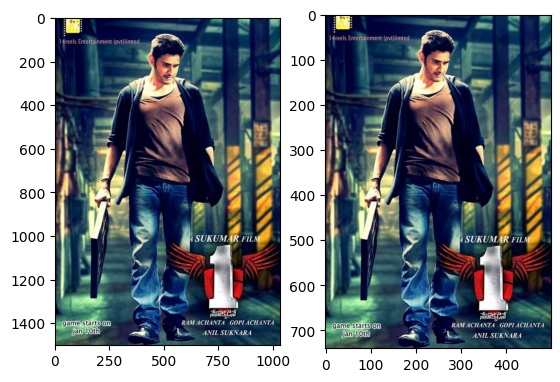

In [6]:
# try on one image
img_path = os.path.join(os.getcwd(), "movies/movie 1 Nenokkadine year 2014/Image_1.jpg")
print(img_path)
assert(os.path.exists(img_path))
print("Original file size = {} kb".format(os.stat(img_path).st_size / 1000))

image = Image.open(img_path)
print("old size = {}".format(image.size))

# resize to (250, 370), or double to (500, 740)
new_size = (500, 740)
print("new size = {}".format(new_size))
new_image = image.resize(new_size)

# now save
new_path = os.path.join(os.getcwd(), "test.jpg")
new_image.save(new_path, quality=50)

# check new size
print("New file size = {} kb".format(os.stat(new_path).st_size / 1000))

# plot
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(image)
axs[1].imshow(new_image)

plt.show()

In [8]:
import re

# the thumbnail size is (W, H) = (500, 740)
thumbnail_size = (500, 740)
thumbnail_ratio = 500 / 740

# thumbnail path
thumbnail_path = os.path.join(os.getcwd(), "thumbnail.jpg")


# insert thumbnail for all images 
with app.app_context():
    # get all movie info list
    movie_list = Movie.query.with_entities(Movie.movie_id, Movie.year, Movie.title).all()

    for info in movie_list:
        movie_id = info[0]
        folder_name = "movie {} year {}".format(info[2], info[1])
        folder_name = re.sub(r'[^A-Za-z0-9 ]+', '', folder_name)
        folder = os.path.join(os.path.join(os.getcwd(), "movies"), folder_name)
        assert(os.path.isdir(folder))
        
        # get the full path for the first image only
        photos = os.listdir(folder)
        # photo = os.path.join(folder, photos[0])
        photos = [os.path.join(folder, photo) for photo in photos]
        
        # open each photo, select the ratio that is closest to thumbnail ratio
        final_photo = None 
        min_diff = None 
        
        for photo in photos:
            image = Image.open(photo)
            w, h = image.size 
            ratio = w / h 
            diff = abs(ratio - thumbnail_ratio)
            
            if min_diff is None or min_diff > diff:
                final_photo = photo 
                min_diff = diff 
            
        # open the "final_photo" which is closest to that ratio
        image = Image.open(final_photo)
        
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # resize
        new_image = image.resize(thumbnail_size)

        # now save
        new_image.save(thumbnail_path, quality=50)
        
        # new_image.save(new_path, quality=50)
        assert(os.path.exists(thumbnail_path))
                
        # open to get the base64
        with open(thumbnail_path, "rb") as file:
            base64_string = base64.b64encode(file.read())
            base64_string = base64_string.decode("utf-8")
            
            movie = db.session.query(Movie).get(movie_id)
            movie.thumbnail = base64_string 
            
            db.session.commit()
        
        os.remove(thumbnail_path)

/tmp/ipykernel_13041/4121162415.py:62: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  movie = db.session.query(Movie).get(movie_id)
/home/yufan/.local/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Compress images and save to the database

save as original 75% quality, to shrink the database

Compress movie images

In [13]:
# insert all movie images into the database
import base64

# temporary image path
tmp_path = os.path.join(os.getcwd(), "tmp.jpg")

# insert all images
with app.app_context():
    # clear everything in the table
    db.session.query(MoviePhoto).delete()
    db.session.commit()
    
    # get all movie info list
    movie_list = Movie.query.with_entities(Movie.movie_id, Movie.year, Movie.title).all()

    for info in movie_list:
        movie_id = info[0]
        folder_name = "movie {} year {}".format(info[2], info[1])
        folder_name = re.sub(r'[^A-Za-z0-9 ]+', '', folder_name)
        folder = os.path.join("movies", folder_name)
        assert(os.path.isdir(folder))
        
        # get the full path for all photos
        photos = os.listdir(folder)
        photos = [os.path.join(folder, photo) for photo in photos]
        
        # now iterate all photos
        for photo in photos:
            image = Image.open(photo)
            
            if image.mode != 'RGB':
                image = image.convert('RGB')
            
            image.save(tmp_path, quality=50)
            
            with open(tmp_path, "rb") as file:
                base64_string = base64.b64encode(file.read())
                base64_string = base64_string.decode("utf-8")
                
                new_photo = MoviePhoto(
                    movie_id = movie_id,
                    photo = base64_string
                )
                
                db.session.add(new_photo)
                db.session.commit()
            
            os.remove(tmp_path)

Compress actor images

In [14]:
# put all actor image to the database
# temporary image path
tmp_path = os.path.join(os.getcwd(), "tmp.jpg")

with app.app_context():    
    # get all actors
    actor_list = Actor.query.with_entities(Actor.actor_id, Actor.name).all()    

    for info in actor_list:
        actor_id = info[0]
        
        folder_name = "actor {}".format(info[1])
        folder_name = re.sub(r'[^A-Za-z0-9 ]+', '', folder_name)
        folder = os.path.join("actors", folder_name)
        assert(os.path.isdir(folder))
        
        # only one photo
        photos = os.listdir(folder)
        photos = [os.path.join(folder, photo) for photo in photos]
        
        if len(photos) == 0:
            print("{} no photo, actor_id = {}".format(folder_name, actor_id))
            continue 
        
        photo = photos[0]
        
        # open the image, compress to 50% quality
        image = Image.open(photo)
        
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        image.save(tmp_path, quality=50)
        
        # open photo, convert to base64
        with open(tmp_path, "rb") as file:
            base64_string = base64.b64encode(file.read())
            base64_string = base64_string.decode("utf-8")
            
            this_actor = Actor.query.get(actor_id)
            this_actor.photo = base64_string 

            db.session.commit()

/tmp/ipykernel_13041/3701025063.py:40: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  this_actor = Actor.query.get(actor_id)


Compress director images

In [15]:
# put all director image to the database
# temporary image path
tmp_path = os.path.join(os.getcwd(), "tmp.jpg")

with app.app_context():    
    # get all directors
    director_list = Director.query.with_entities(Director.director_id, Director.name).all()

    for info in director_list:
        director_id = info[0]
        
        folder_name = "director {}".format(info[1])
        folder_name = re.sub(r'[^A-Za-z0-9 ]+', '', folder_name)
        folder = os.path.join("directors", folder_name)
        assert(os.path.isdir(folder))
        
        # only one photo
        photos = os.listdir(folder)
        photos = [os.path.join(folder, photo) for photo in photos]
        
        if len(photos) == 0:
            print("{} no photo, director_id = {}".format(folder_name, director_id))
            continue 
        
        photo = photos[0]

        # compress image
        image = Image.open(photo)
        
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        image.save(tmp_path, quality=50)
        
        
        # open photo, convert to base64
        with open(tmp_path, "rb") as file:
            base64_string = base64.b64encode(file.read())
            base64_string = base64_string.decode("utf-8")
            
            this_director = Director.query.get(director_id)
            this_director.photo = base64_string 

            db.session.commit()

/tmp/ipykernel_13041/4209810812.py:41: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  this_director = Director.query.get(director_id)


## Insert avatar directly to the database

In [16]:
# insert these data to the database
with app.app_context():   
    photos = os.listdir("avatars/cartoon avatar single")
    photos = [os.path.join("avatars/cartoon avatar single", photo) for photo in photos]
    
    # only around 75 images are download
    for user_id in range(1, 100+1):
        photo = photos[user_id % len(photos)]
        
        with open(photo, "rb") as file:
            base64_string = base64.b64encode(file.read())
            base64_string = base64_string.decode("utf-8")
            
            this_user = User.query.get(user_id)
            this_user.avatar = base64_string 
            db.session.commit()       

/tmp/ipykernel_13041/2157022204.py:14: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  this_user = User.query.get(user_id)
